# Constraint in paralogs
Exploring differences in constraint between paralogous genes.

## To do
- [X] Plot the distibution of OE95 deltas per region
- [X] Manually explore the ~5 largest oe95 deltas per region


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src import constants as C
from src import statistics_for_plots as sfp

FILE_IN = "data/interim/paralogs_delta_constraint.tsv"

df = pd.read_csv(FILE_IN, sep="\t").pipe(sfp.sort_column, "region")
df.sample(3)

,paralog_family_id,region,paralogs,most_constrained,least_constrained,oe95_min,oe95_max,oe95_delta
666,1160,NMD target,"TNIP2,TNIP3,TNIP1",TNIP1,TNIP2,0.379217,0.972203,0.592987
136,242,Distal,"ZNF618,FIZ1",ZNF618,FIZ1,0.368904,0.920129,0.551225
545,967,NMD target,"CHD7,CHD8",CHD7,CHD8,0.111071,0.189569,0.078498


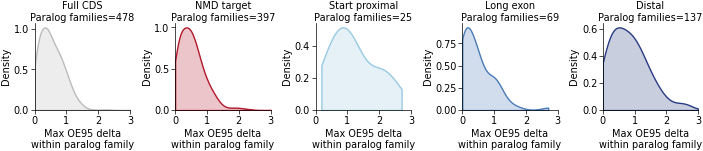

In [2]:
plt.style.use(C.STYLE_DEFAULT)
plt.style.use(C.COLOR_REGIONS)
fig, axs = plt.subplots(
    1, 5, figsize=(18 * C.CM, 4 * C.CM), layout="constrained", sharex=True
)

for ax, (name, data), color in zip(axs, df.groupby("region"), sns.color_palette()):
    x = data["oe95_delta"]

    sns.kdeplot(ax=ax, x=x, color=color, fill=True, cut=0)
    ax.set_title(f"{name}\nParalog families={len(data)}")
    ax.set_xlabel("Max OE95 delta\nwithin paralog family")
    ax.set_xlim(0, 3)

/tmp/ipykernel_408121/777473820.py:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0, hspace=0)


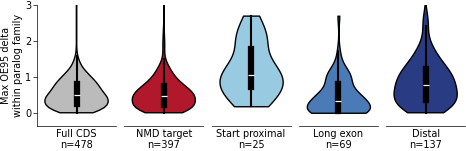

In [25]:
fig, axs = plt.subplots(1, 5, figsize=(12 * C.CM, 4 * C.CM), layout="constrained", sharey=True)

for (i, ax), (name, data), color in zip(
    enumerate(axs), df.groupby("region"), sns.color_palette()
):
    sns.violinplot(
        ax=ax,
        y=data["oe95_delta"],
        color=color,
        cut=0,
        fill=True,
        saturation=1,
        linewidth=1,
        linecolor="black",
    )
    ax.set_ylim(top=3)
    ax.set_xlabel(f"{name}\nn={len(data)}")
    ax.set_ylabel("Max OE95 delta\nwithin paralog family")
    ax.label_outer()
    # sns.despine(ax=ax, bottom=True)
    ax.set_xticks([])
    if i >= 1:
        sns.despine(ax=ax, left=True,)
        ax.tick_params(length=0)


In [4]:
df[df.oe95_delta < 0]

,paralog_family_id,region,paralogs,most_constrained,least_constrained,oe95_min,oe95_max,oe95_delta


In [5]:
df[df.groupby("region")["oe95_delta"].rank(ascending=False) <= 5].sort_values(
    ["region", "oe95_delta"], ascending=False
)

,paralog_family_id,region,paralogs,most_constrained,least_constrained,oe95_min,oe95_max,oe95_delta
249,448,Distal,"TSHZ1,TSHZ3,TSHZ2",TSHZ3,TSHZ2,0.243936,4.578363,4.334427
1053,1815,Distal,"COPS2,PSMD11",COPS2,PSMD11,0.513833,4.265371,3.751538
57,110,Distal,"SECISBP2,SECISBP2L",SECISBP2L,SECISBP2,0.401834,3.009251,2.607418
1101,1910,Distal,"ATP1B1,ATP1B3,ATP4B,ATP1B2",ATP1B1,ATP4B,0.379695,2.958995,2.579300
499,886,Distal,"FSCN1,FSCN3,FSCN2",FSCN1,FSCN3,0.521973,3.074903,2.552931
263,478,Long exon,"ASXL2,ASXL3,ASXL1",ASXL3,ASXL1,0.166044,2.864777,2.698733
1057,1827,Long exon,"GRM7,GRM6,GRM4,GRM8",GRM7,GRM6,0.527226,2.256687,1.729462
442,776,Long exon,"PROX1,PROX2",PROX1,PROX2,0.266846,1.692769,1.425924
106,191,Long exon,"FYB2,FYB1,PRAM1",FYB1,FYB2,0.533006,1.891401,1.358395
500,886,Long exon,"FSCN1,FSCN3,FSCN2",FSCN1,FSCN2,0.416657,1.655026,1.238370


## Initial interpretation
Some of these results are garbage.  
For example, the golgin genes and SMN genes have strong constraint deltas, but are such close paralogs that they are very poorly covered.
The OE95 scores in these cases are meaningless.

### Transcript level
**DDI1, DDI2, NRIP2, NRIP3, UBAC2** are a nicer example.  
DDI2 is highly constrained (LOEUF 0.22). 
DDI1 is not (LOEUF 1.34).
DDI1 and DDI2 have a last common ancestor with marsupials.
The other genes are more distant paralogs.

**SIRPA, SIRPB1, SIRPB2, SIRPD, SIRPG** are also nice.
They show a patern of progressive duplications.

| Gene | MRCA | Identity to SIRPA | LOEUF |
|-|-|-|-|
| SIRPA | - | 100% | 0.31 |
| SIRPB1 | Apes | 78% | 1.19 |
| SIRPG | Simians | 73% | 1.36 |
| SIRPD | Placentals | 39% | 1.61 |
| SIRPB2 | Amniotes | 25% | 0.95 |

## Start proximal
**TAF5L vs TAF5** is a nice example
Both have strong transcript level constraint (LOEUF 0.22 and 0.37 respectively).
They have reasonable sequence identity. TAF5L is the smaller gene and has 40% sequence identity to TAF5.
The MRCA is in bilateral animals.
TAF5L is specifically highly constrained in the start proximal region, and in particular the highly expressed first ~140nt of the first exon.
These early nucleotides have especially poor sequence identity with TAF5, have weak phyloP scores, and do not overlap known Pfam domains.

**AP1G1	& AP1G2** are fairly interesting.  
Very different constraint, and AP1G2 is more lowly expressed by pext.
Fair sequence identity, especially in the first 150nt.
But AP1G1 shows very strong start-proximal constraint, in contrast with AP1G2. 
Both share an alpha adaptin C2 domain which extends from the first coding exon.

**The RFX1 - RFX4** family show a nice story as well.
(Paralog family ID 547)

## Distal
**FSCN1 and FSCN3** are fairly interesting.
FSCN1 is reasonably constrained (LOEUF 0.51), and similarly in distal regions.  
It has limited sequence identity to FSCN3 (30%).  
It one of its fascin domains is encoded in the last exon.  
By constrast, FSCN3 has a poorly conserved last exon which does not encode any Pfam domains.

## Long exon
**ASXL1 vs ASXL3** is interesting.
Both are associated with severe NDD.  
They have limited sequence similarity.
ASXL3 has a distinctive pattern of constraint which marries with the distribution of pathogenic LoFs.
ASXL1 is the inverse. It is apparently enriched for LoFs precisely in those regions.
This is because those LoFs, as somatic variants, drive haematopoetic clonal expansion. 
In the germline they cause an NDD.  
It's a neat example! (But not showing anything "new").

**PROX1 and PROX2** show markedly different constraint.

## Conclusions
I don't think there are any startling findings from this first look at the data. There may be further interesting examples to find in a deeper dive, and these statistics are useful to have. They could be added as supplementary information.